# Projeto 8 - Y.Afisha

# 1. Carregamento e Preparação Dos Dados

### 1.1 Carregando Dados & Importando Bibliotecas

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')  

sns.set_palette('Set2')
sns.set_context('talk')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
visits_df = pd.read_csv('datasets/visits_log_us.csv')
orders_df = pd.read_csv('datasets/orders_log_us.csv')
costs_df = pd.read_csv('datasets/costs_us.csv')

# 2. Checagem & Preparação Dos Dados

### 2.1 Dataframe visits_df

In [3]:
print('Dataframe Info:') 
visits_df.info(memory_usage='deep')
print('Dataframe Head:')
visits_df.head()

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 71.1 MB
Dataframe Head:


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
# Conversão de colunas com valores repetitivos para categoria
visits_df['Device'] = visits_df['Device'].astype('category')
# Conversão de strings para datetime
visits_df['Start Ts'] = pd.to_datetime(visits_df['Start Ts'], format="%Y-%m-%d %H:%M:%S")
visits_df['End Ts'] = pd.to_datetime(visits_df['End Ts'], format="%Y-%m-%d %H:%M:%S")

In [5]:
#analisando uso de memmoria após otimização
print('Dataframe Info após otimização:')
visits_df.info(memory_usage='deep')

Dataframe Info após otimização:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [6]:
missing_values = visits_df.isnull().sum()
missing_percent = (missing_values / len(visits_df)) * 100

missing_df = pd.DataFrame({
'Missing Values': missing_values,
'Percentage': missing_percent
})
print(missing_df)

           Missing Values  Percentage
Device                  0        0.00
End Ts                  0        0.00
Source Id               0        0.00
Start Ts                0        0.00
Uid                     0        0.00


### 2.2 Dataframe orders_df

In [7]:
print('Dataframe Info:') 
orders_df.info(memory_usage='deep')
print('Dataframe Head:')
orders_df.head()

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.0 MB
Dataframe Head:


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [8]:
# Conversão de strings para datetime
orders_df['Buy Ts'] = pd.to_datetime(orders_df['Buy Ts'], format="%Y-%m-%d %H:%M:%S")

In [9]:
# analisando uso de memoria após otimização
orders_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [10]:
missing_values = orders_df.isnull().sum()
missing_percent = (missing_values / len(orders_df)) * 100

missing_df = pd.DataFrame({
'Missing Values': missing_values,
'Percentage': missing_percent
})
print(missing_df)

         Missing Values  Percentage
Buy Ts                0        0.00
Revenue               0        0.00
Uid                   0        0.00


### 2.3 Dataframe costs_df

In [11]:
print('Dataframe Info:') 
costs_df.info(memory_usage='deep')
print('Dataframe Head:')
costs_df.head()

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 186.3 KB
Dataframe Head:


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [12]:
# Conversão de strings para datetime
costs_df['dt'] = pd.to_datetime(costs_df['dt'])

In [13]:
costs_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [14]:
missing_values = costs_df.isnull().sum()
missing_percent = (missing_values / len(costs_df)) * 100

missing_df = pd.DataFrame({
'Missing Values': missing_values,
'Percentage': missing_percent
})
print(missing_df)

           Missing Values  Percentage
source_id               0        0.00
dt                      0        0.00
costs                   0        0.00


# 3. Cálculo de Métricas (Uso Do Produto por Dia, Semana e Mês)

### 3.1 Cálculo de DAU

Média de usuários ativos por dia: 907.99


<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='Start Ts'>

Text(0.5, 1.0, 'Daily Active Users (DAU)')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Number of Unique Users')

(array([17348., 17410., 17471., 17532., 17591., 17652.]),
 [Text(17348.0, 0, '2017-07'),
  Text(17410.0, 0, '2017-09'),
  Text(17471.0, 0, '2017-11'),
  Text(17532.0, 0, '2018-01'),
  Text(17591.0, 0, '2018-03'),
  Text(17652.0, 0, '2018-05')])

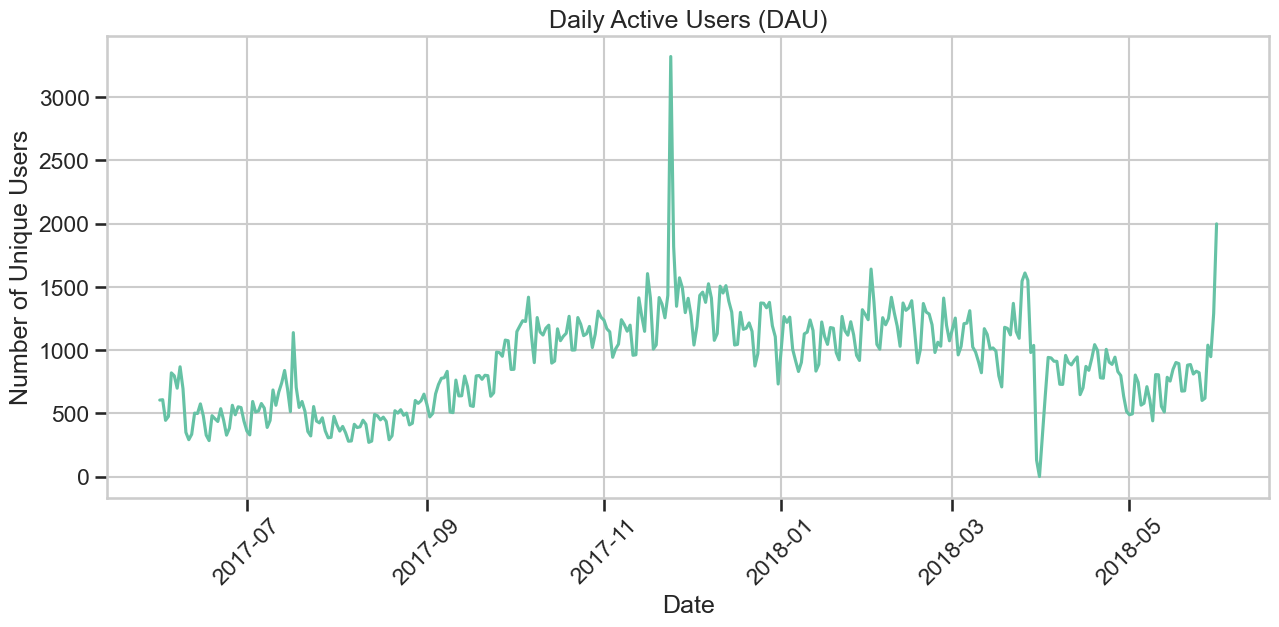

In [15]:
# Cálculo de DAU
dau = visits_df.groupby(visits_df['Start Ts'].dt.date)['Uid'].nunique()

# Calculando e exibindo a média
print(f'Média de usuários ativos por dia: {dau.mean():.2f}')

# Criando o gráfico
plt.figure(figsize=(15, 6))
sns.lineplot(x=dau.index, y=dau.values)
plt.title('Daily Active Users (DAU)')
plt.xlabel('Date')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.show()

### 3.2 Cálculo de WAU

Média de usuários ativos por semana: 5825.29


<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='week'>

Text(0.5, 1.0, 'Weekly Active Users (WAU)')

Text(0.5, 0, 'Week Number')

Text(0, 0.5, 'Number of Unique Users')

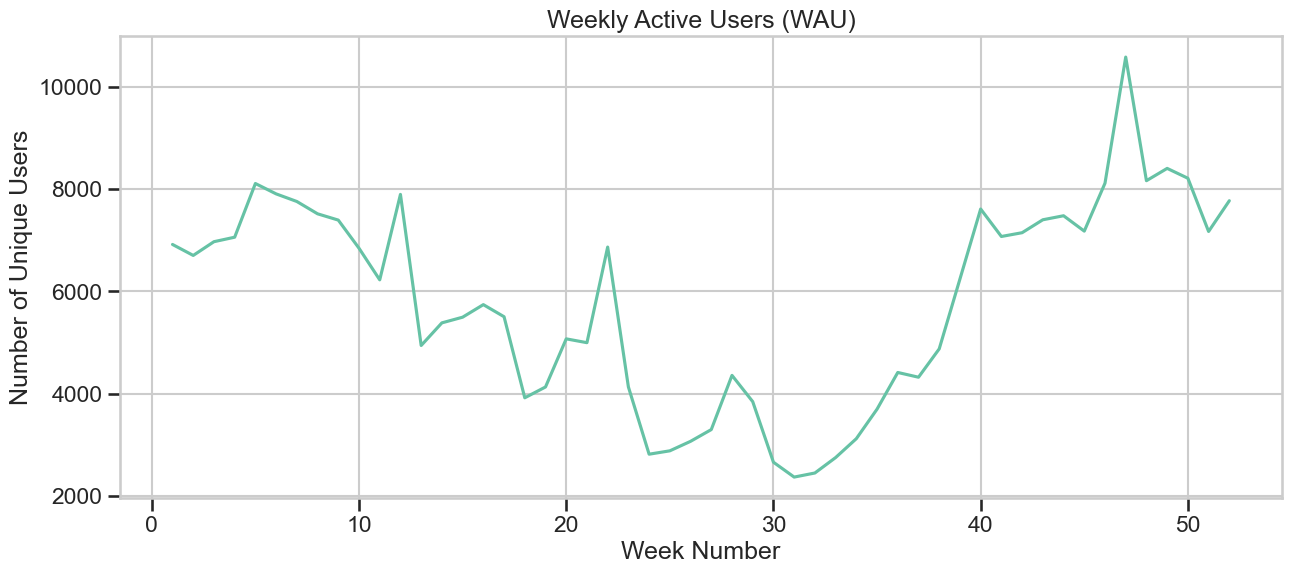

In [16]:
# Cálculo de WAU
wau = visits_df.groupby(visits_df['Start Ts'].dt.isocalendar().week)['Uid'].nunique()

# Calculando e exibindo a média
print(f'Média de usuários ativos por semana: {wau.mean():.2f}')

# Criando o gráfico
plt.figure(figsize=(15, 6))
sns.lineplot(x=wau.index, y=wau.values)
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Week Number')
plt.ylabel('Number of Unique Users')
plt.show()


### 3.3 Cálculo de MAU

Média de usuários ativos por mês: 23228.42


<Figure size 1500x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Monthly Active Users (MAU)')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Unique Users')

([<matplotlib.axis.XTick at 0x1c583d9ad50>,
 [Text(0, 0, '2017-06'),
  Text(1, 0, '2017-07'),
  Text(2, 0, '2017-08'),
  Text(3, 0, '2017-09'),
  Text(4, 0, '2017-10'),
  Text(5, 0, '2017-11'),
  Text(6, 0, '2017-12'),
  Text(7, 0, '2018-01'),
  Text(8, 0, '2018-02'),
  Text(9, 0, '2018-03'),
  Text(10, 0, '2018-04'),
  Text(11, 0, '2018-05')])

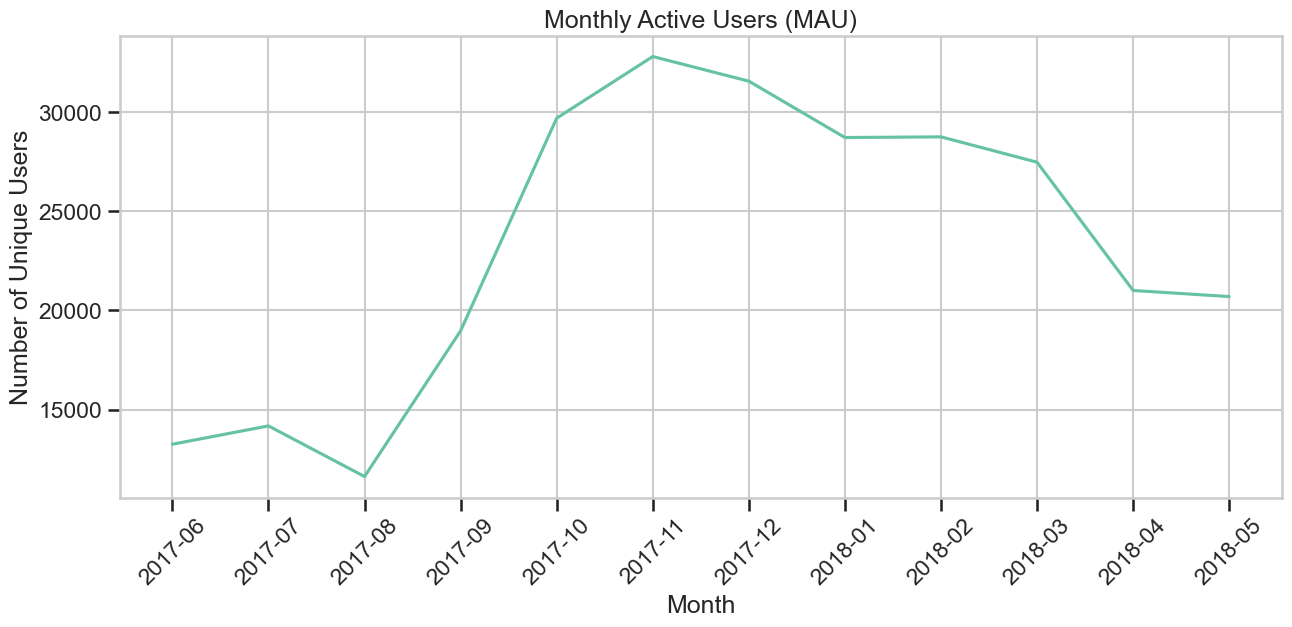

In [17]:
# Cálculo de MAU
mau = visits_df.groupby(visits_df['Start Ts'].dt.to_period('M'))['Uid'].nunique()

# Calculando e exibindo a média
print(f'Média de usuários ativos por mês: {mau.mean():.2f}')

# Criando o gráfico
plt.figure(figsize=(15, 6))
sns.lineplot(x=range(len(mau)), y=mau.values)
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Month')
plt.ylabel('Number of Unique Users')
plt.xticks(range(len(mau)), mau.index.astype(str), rotation=45)
plt.show()

# 4. Relatório de Sessões Diárias

In [18]:
# Adicionar coluna de data (sem hora) para análise diária
visits_df['Date'] = visits_df['Start Ts'].dt.date

# Calcular número de sessões por dia
daily_sessions = visits_df.groupby('Date').size().reset_index(name='Sessions_Count')

# Exibir os primeiros registros do resultado
print("Primeiras linhas da contagem de sessões diárias:")
daily_sessions.head()

# Estatísticas descritivas das sessões diárias
print("\nEstatísticas descritivas das sessões diárias:")
daily_sessions['Sessions_Count'].describe()

Primeiras linhas da contagem de sessões diárias:


,Date,Sessions_Count
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893



Estatísticas descritivas das sessões diárias:


count    364.00
mean     987.36
std      418.99
min        1.00
25%      635.50
50%     1003.00
75%     1280.00
max     4042.00
Name: Sessions_Count, dtype: float64

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Número de Sessões por Dia')

Text(0.5, 0, 'Data')

Text(0, 0.5, 'Número de Sessões')

(array([17348., 17410., 17471., 17532., 17591., 17652.]),
 [Text(17348.0, 0, '2017-07'),
  Text(17410.0, 0, '2017-09'),
  Text(17471.0, 0, '2017-11'),
  Text(17532.0, 0, '2018-01'),
  Text(17591.0, 0, '2018-03'),
  Text(17652.0, 0, '2018-05')])

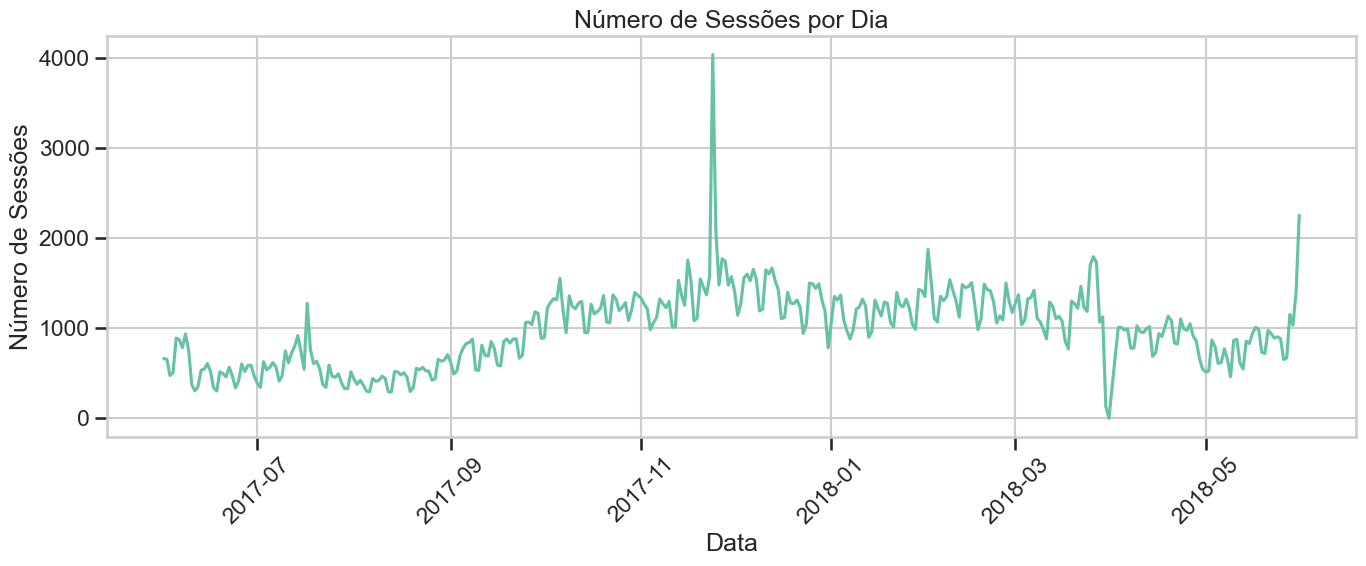

In [19]:
# Visualizar a distribuição de sessões ao longo do tempo
plt.figure(figsize=(14, 6))
plt.plot(daily_sessions['Date'], daily_sessions['Sessions_Count'])
plt.title('Número de Sessões por Dia')
plt.xlabel('Data')
plt.ylabel('Número de Sessões')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Sessions_Count', ylabel='Count'>

Text(0.5, 1.0, 'Distribuição do Número de Sessões Diárias')

Text(0.5, 0, 'Número de Sessões')

Text(0, 0.5, 'Frequência')

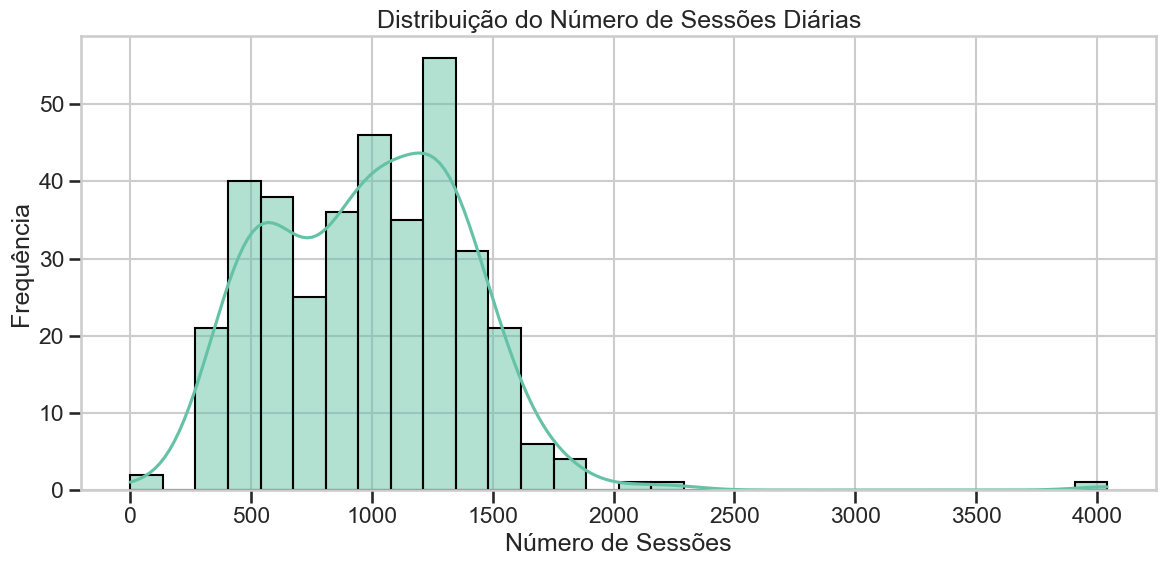

In [20]:
# Histograma da distribuição de sessões diárias
plt.figure(figsize=(12, 6))
sns.histplot(daily_sessions['Sessions_Count'], bins=30, kde=True)
plt.title('Distribuição do Número de Sessões Diárias')
plt.xlabel('Número de Sessões')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Análise de Comprimento de Sessões

In [21]:
# Calcular a duração de cada sessão em segundos
visits_df['session_duration_sec'] = (
    visits_df['End Ts'] - visits_df['Start Ts']
).dt.seconds

# Visualizar as primeiras linhas do DataFrame com as durações
print("Primeiras linhas com duração de sessão:")
visits_df[['Uid', 'Start Ts', 'End Ts', 'session_duration_sec']].head(10)

# Estatísticas descritivas da duração das sessões
print("\nEstatísticas descritivas da duração das sessões (em segundos):")
session_stats = visits_df['session_duration_sec'].describe()
print(session_stats)

# Calcular a duração média da sessão (ASL)
asl = visits_df['session_duration_sec'].mean()
print(f"\nDuração Média da Sessão (ASL): {asl:.2f} segundos")

# Calcular a moda (duração mais comum)
duration_mode = visits_df['session_duration_sec'].mode().values[0]
print(f"Duração mais comum (moda): {duration_mode} segundos")

# Converter para minutos para facilitar a interpretação
visits_df['session_duration_min'] = visits_df['session_duration_sec'] / 60

Primeiras linhas com duração de sessão:


,Uid,Start Ts,End Ts,session_duration_sec
0,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,1080
1,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,1680
2,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,0
3,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,1440
4,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,0
5,16007536194108375387,2017-09-03 21:35:00,2017-09-03 21:36:00,60
6,6661610529277171451,2018-01-30 11:13:00,2018-01-30 12:09:00,3360
7,11423865690854540312,2017-11-05 15:14:00,2017-11-05 15:15:00,60
8,2987360259350925644,2017-07-19 10:41:00,2017-07-19 10:44:00,180
9,1289240080042562063,2017-11-08 13:42:00,2017-11-08 13:43:00,60



Estatísticas descritivas da duração das sessões (em segundos):
count   359400.00
mean       643.51
std       1016.33
min          0.00
25%        120.00
50%        300.00
75%        840.00
max      84480.00
Name: session_duration_sec, dtype: float64

Duração Média da Sessão (ASL): 643.51 segundos
Duração mais comum (moda): 60 segundos


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Device', ylabel='session_duration_min'>

<Axes: xlabel='Device', ylabel='session_duration_min'>

Text(0.5, 1.0, 'Duração das Sessões por Tipo de Dispositivo')

Text(0.5, 0, 'Tipo de Dispositivo')

Text(0, 0.5, 'Duração (minutos)')

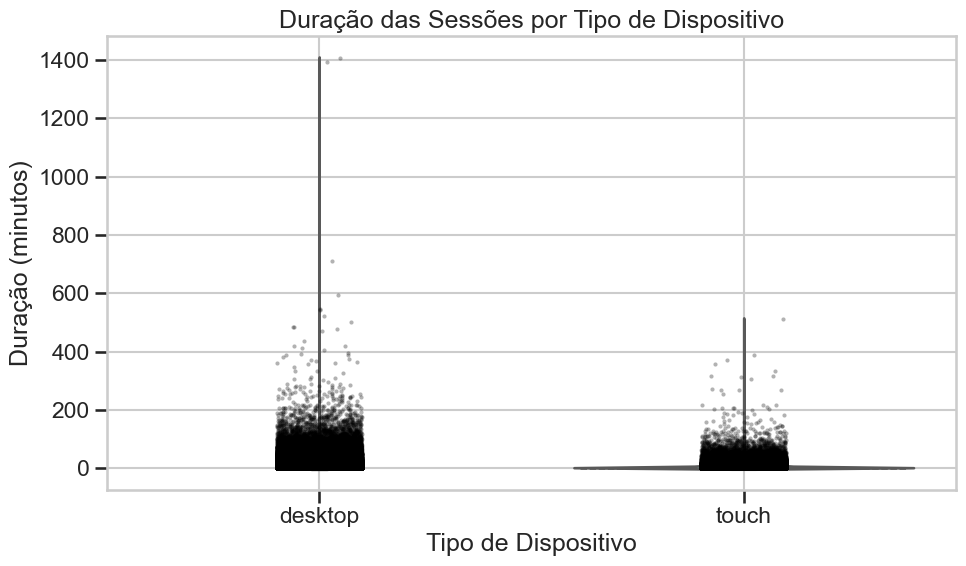

In [22]:
# Visualização da duração de sessão por tipo de dispositivo
plt.figure(figsize=(10, 6))
# Usando violinplot para mostrar a distribuição dos dados
sns.violinplot(x='Device', y='session_duration_min', data=visits_df, inner='quartile')
# Adicionando pontos para mostrar a distribuição real dos dados
sns.stripplot(x='Device', y='session_duration_min', data=visits_df, 
              size=3, color='black', alpha=0.3, jitter=True)
plt.title('Duração das Sessões por Tipo de Dispositivo')
plt.xlabel('Tipo de Dispositivo')
plt.ylabel('Duração (minutos)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Análise de Frequência de Retorno dos Usuários

Métricas de retorno dos usuários:
Total de usuários: 228169
Média de visitas por usuário: 1.58
Mediana de visitas por usuário: 1.00


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='months_since_first', ylabel='cohort_month'>

Text(0.5, 1.0, 'Taxa de Retenção de Usuários por Coorte Mensal (%)')

Text(0.5, 45.083333333333314, 'Meses desde a primeira visita')

Text(107.08333333333333, 0.5, 'Coorte (mês da primeira visita)')

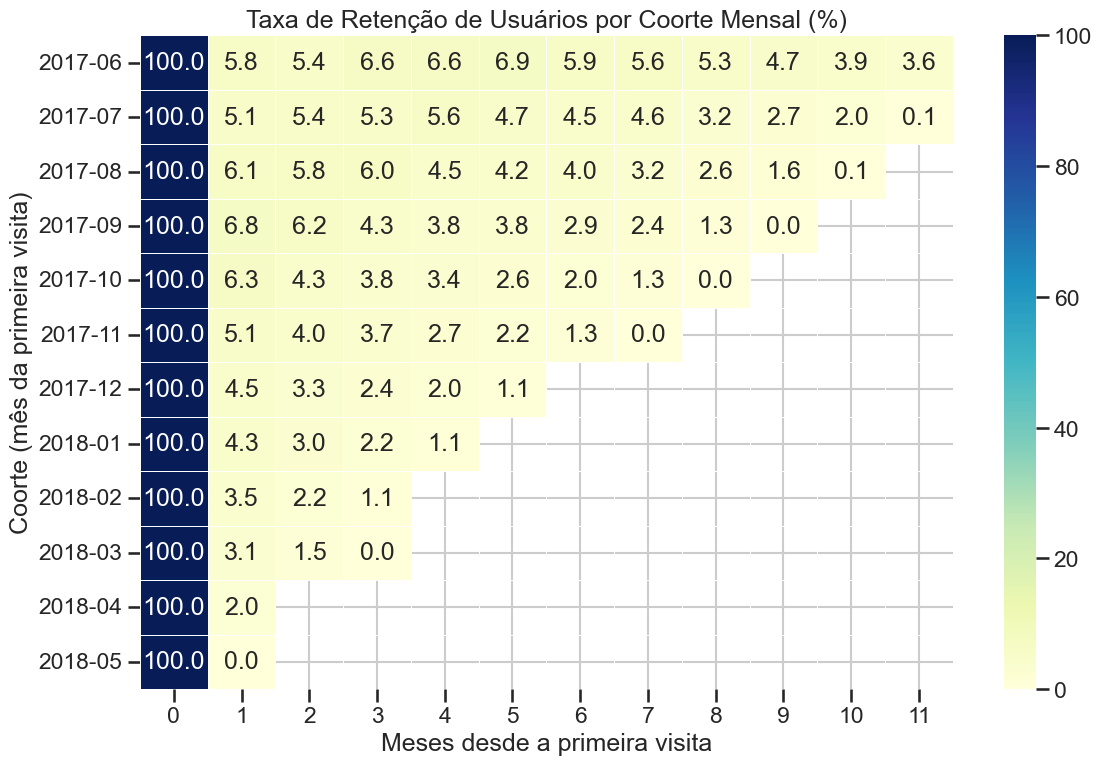

In [23]:
# Análise de frequência de retorno dos usuários

# 1. Identificando a primeira visita de cada usuário
first_visits = visits_df.groupby('Uid')['Start Ts'].min().reset_index()
first_visits.rename(columns={'Start Ts': 'first_visit'}, inplace=True)

# 2. Adicionando a informação de primeira visita ao dataframe de visitas
user_visits = visits_df.merge(first_visits, on='Uid')

# 3. Calculando o intervalo entre visitas (em dias)
user_visits['days_since_first'] = (user_visits['Start Ts'] - user_visits['first_visit']).dt.days

# 4. Agrupando por usuário para contar visitas e intervalo médio
return_metrics = user_visits.groupby('Uid').agg({
    'Start Ts': 'count',
    'days_since_first': 'max'
}).rename(columns={
    'Start Ts': 'visit_count',
    'days_since_first': 'days_active'
})

# 5. Análise básica de frequência de retorno
print("Métricas de retorno dos usuários:")
print(f"Total de usuários: {return_metrics.shape[0]}")
print(f"Média de visitas por usuário: {return_metrics['visit_count'].mean():.2f}")
print(f"Mediana de visitas por usuário: {return_metrics['visit_count'].median():.2f}")

# 6. Segmentando usuários por frequência
return_metrics['frequency_segment'] = pd.cut(
    return_metrics['visit_count'], 
    bins=[0, 1, 2, 5, 10, float('inf')],
    labels=['Uma visita', '2 visitas', '3-5 visitas', '6-10 visitas', 'Mais de 10 visitas']
)

# 7. Análise de retenção com heatmap
# Extrair o mês da primeira visita para cada usuário
user_visits['cohort_month'] = user_visits['first_visit'].dt.to_period('M')

# Converter dias para meses (arredondando para baixo)
user_visits['months_since_first'] = user_visits['days_since_first'] // 30

# Limitar a análise a 12 meses para melhor visualização
user_visits = user_visits[user_visits['months_since_first'] < 12]

# Criar uma tabela de contagem de usuários por coorte e mês
cohort_data = user_visits.groupby(['cohort_month', 'months_since_first'])['Uid'].nunique().reset_index()

# Pivotear a tabela para formato adequado ao heatmap
cohort_pivot = cohort_data.pivot(index='cohort_month', 
                                columns='months_since_first', 
                                values='Uid')

# Calcular a taxa de retenção (percentual em relação ao mês 0)
cohort_size = cohort_pivot[0]
retention_pivot = cohort_pivot.divide(cohort_size, axis=0) * 100

# Plotar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(retention_pivot, annot=True, fmt='.1f', cmap='YlGnBu', 
            linewidths=.5, vmin=0, vmax=100)
plt.title('Taxa de Retenção de Usuários por Coorte Mensal (%)')
plt.xlabel('Meses desde a primeira visita')
plt.ylabel('Coorte (mês da primeira visita)')
plt.tight_layout()
plt.show()

# 7. Análise de Conversão: Tempo Entre Registro e Primeira Compra

In [24]:
# Análise de tempo até a conversão

# Identificando a primeira visita de cada usuário
first_visit = visits_df.groupby('Uid')['Start Ts'].min().reset_index()
first_visit.rename(columns={'Start Ts': 'first_visit_date'}, inplace=True)

# Identificando a primeira compra de cada usuário
first_purchase = orders_df.groupby('Uid')['Buy Ts'].min().reset_index()
first_purchase.rename(columns={'Buy Ts': 'first_purchase_date'}, inplace=True)

In [25]:
# Juntando os dados
conversion_data = first_visit.merge(first_purchase, on='Uid', how='inner')

In [26]:
# Calculando dias até a conversão
conversion_data['days_to_conversion'] = (
    conversion_data['first_purchase_date'] - conversion_data['first_visit_date']
).dt.days

# Categorias de conversão
conversion_data['conversion_category'] = pd.cut(
    conversion_data['days_to_conversion'],
    bins=[-1, 0, 1, 7, 30, float('inf')],
    labels=['Mesmo dia', '1 dia', '2-7 dias', '8-30 dias', '30+ dias']
)

Distribuição do tempo até a primeira compra:
conversion_category
Mesmo dia    26363
1 dia         1011
2-7 dias      2069
8-30 dias     2178
30+ dias      4902
Name: count, dtype: int64
Taxa de conversão: 16.01%


<Axes: xlabel='conversion_category'>

Text(0.5, 1.0, 'Tempo entre primeira visita e primeira compra')

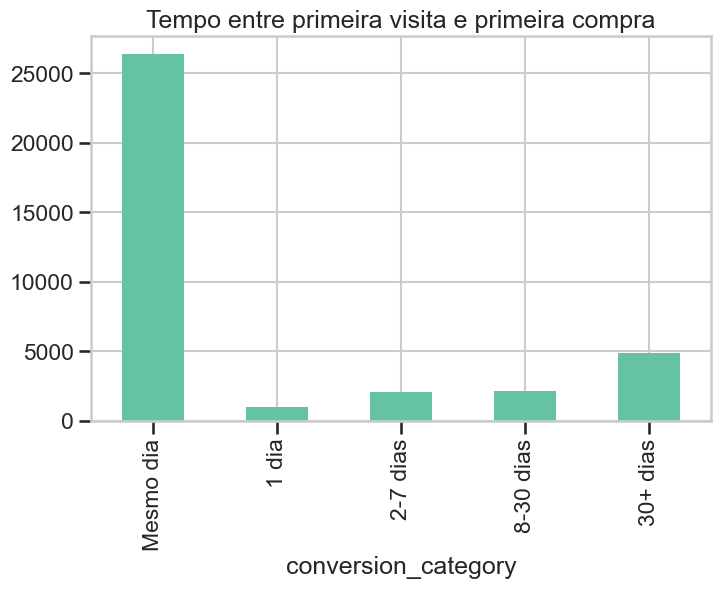

In [27]:
# Contagem por categoria
conversion_counts = conversion_data['conversion_category'].value_counts().sort_index()
print("Distribuição do tempo até a primeira compra:")
print(conversion_counts)

# Taxa de conversão geral
total_visitors = len(first_visit)
total_purchasers = len(conversion_data)
print(f"Taxa de conversão: {total_purchasers/total_visitors:.2%}")

# Gráfico
conversion_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Tempo entre primeira visita e primeira compra')
plt.show()

# 8. Análise de Pedidos por Cliente ao Longo do Tempo

In [28]:
# Identificar primeira compra de cada cliente
first_orders = orders_df.groupby('Uid')['Buy Ts'].min().reset_index()
first_orders.rename(columns={'Buy Ts': 'first_order_date'}, inplace=True)

# Adicionar informação ao dataframe original
orders_with_first = orders_df.merge(first_orders, on='Uid')

In [29]:
# Converter para mês para facilitar análise
orders_with_first['order_month'] = orders_with_first['Buy Ts'].dt.to_period('M')
orders_with_first['first_order_month'] = orders_with_first['first_order_date'].dt.to_period('M')

In [30]:
# Calcular tempo desde a primeira compra (em meses)
orders_with_first['months_since_first'] = ((orders_with_first['order_month'].dt.start_time - 
                                          orders_with_first['first_order_month'].dt.start_time).dt.days / 30).astype(int)

# Contar pedidos por cliente por mês desde a primeira compra
orders_count = orders_with_first.groupby(['first_order_month', 'months_since_first']).size().reset_index(name='orders')
customers_count = orders_with_first.groupby(['first_order_month', 'months_since_first'])['Uid'].nunique().reset_index(name='customers')


Média de pedidos por cliente por mês desde a primeira compra:
months_since_first
0    1.13
1    1.99
2    2.08
3    2.06
4    1.84
5    1.91
6    2.10
7    2.03
8    2.22
9    1.99
10   2.09
11   1.62
Name: avg_orders_per_customer, dtype: float64


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='months_since_first', ylabel='first_order_month'>

Text(0.5, 1.0, 'Média de pedidos por cliente por mês desde a primeira compra')

Text(0.5, 45.083333333333314, 'Meses desde a primeira compra (idade da coorte)')

Text(107.08333333333333, 0.5, 'Mês da primeira compra (coorte)')

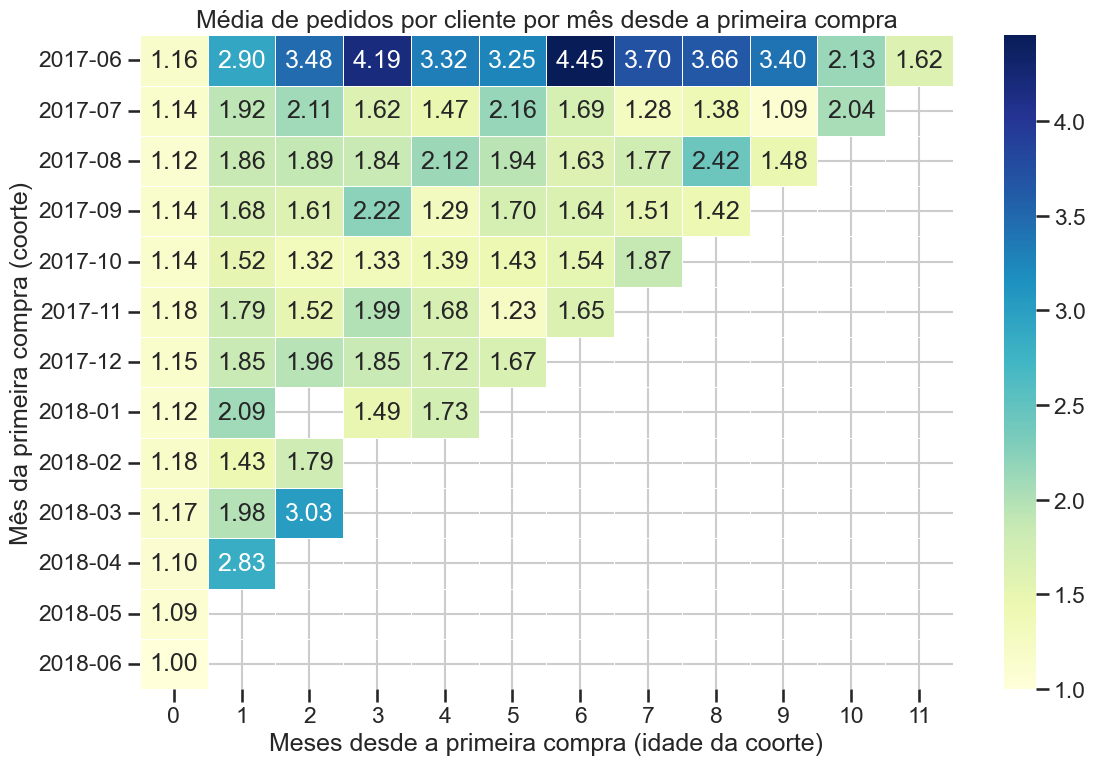

In [31]:
# Unir os dataframes
order_stats = orders_count.merge(customers_count, on=['first_order_month', 'months_since_first'])

# Calcular média de pedidos por cliente
order_stats['avg_orders_per_customer'] = order_stats['orders'] / order_stats['customers']

# Resumo geral
print("Média de pedidos por cliente por mês desde a primeira compra:")
avg_by_month = order_stats.groupby('months_since_first')['avg_orders_per_customer'].mean()
print(avg_by_month)

# Criar um pivot table para o heatmap
heatmap_data = order_stats.pivot_table(
    values='avg_orders_per_customer',
    index='first_order_month',
    columns='months_since_first',
    aggfunc='mean'
)

# Visualização com heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('Média de pedidos por cliente por mês desde a primeira compra')
plt.xlabel('Meses desde a primeira compra (idade da coorte)')
plt.ylabel('Mês da primeira compra (coorte)')
plt.tight_layout()
plt.show()

# 9. Análise do Volume Médio de Compra (Por Mes)

Volume médio geral: $5.00

Volume médio por mês:
purchase_month
2017-06   4.06
2017-07   5.31
2017-08   4.85
2017-09   5.42
2017-10   4.93
2017-11   4.78
2017-12   5.85
2018-01   4.11
2018-02   4.84
2018-03   5.41
2018-04   5.15
2018-05   4.77
2018-06   3.42
Freq: M, Name: Revenue, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='purchase_month'>

Text(0.5, 1.0, 'Volume Médio de Compra por Mês')

Text(0, 0.5, 'Valor Médio ($)')

Text(0.5, 0, 'Mês')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2017-06'),
  Text(1, 0, '2017-07'),
  Text(2, 0, '2017-08'),
  Text(3, 0, '2017-09'),
  Text(4, 0, '2017-10'),
  Text(5, 0, '2017-11'),
  Text(6, 0, '2017-12'),
  Text(7, 0, '2018-01'),
  Text(8, 0, '2018-02'),
  Text(9, 0, '2018-03'),
  Text(10, 0, '2018-04'),
  Text(11, 0, '2018-05'),
  Text(12, 0, '2018-06')])

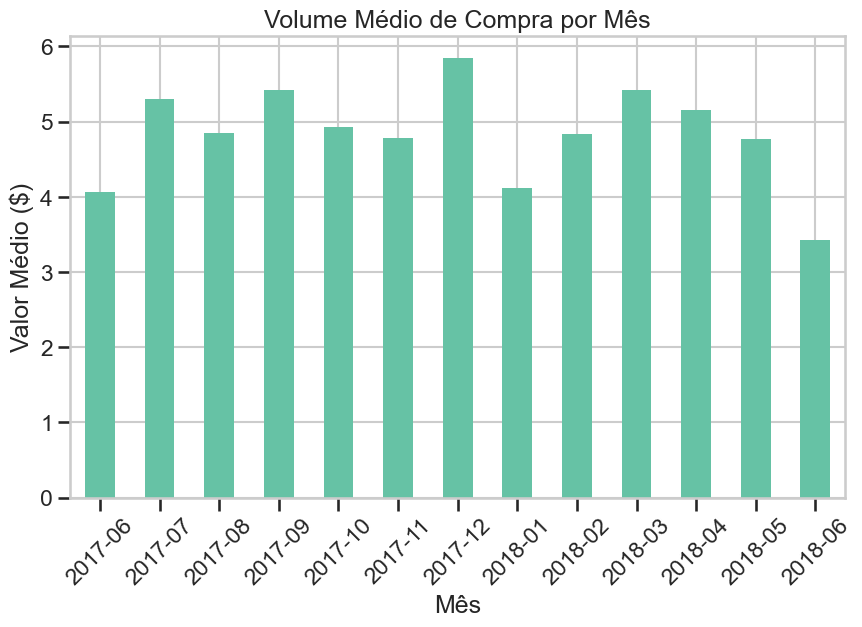

In [32]:
# Cálculo da média de todas as compras
average_purchase = orders_df['Revenue'].mean()
print(f'Volume médio geral: ${average_purchase:.2f}')

# Análise por mês para verificar tendências
orders_df['purchase_month'] = orders_df['Buy Ts'].dt.to_period('M')
monthly_average = orders_df.groupby('purchase_month')['Revenue'].mean()

print('\nVolume médio por mês:')
print(monthly_average)

# Visualização da média de compras por mês
plt.figure(figsize=(10, 6))
monthly_average.plot(kind='bar')
plt.title('Volume Médio de Compra por Mês')
plt.ylabel('Valor Médio ($)')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.show()

# 10. Análise do Valor do Tempo de Vida do Cliente (LTV)

In [33]:
# Agrupando os pedidos por usuário para calcular a receita total por usuário
user_revenue = orders_df.groupby('Uid').agg({'Revenue': 'sum'}).reset_index()

# Calculando a média de receita por usuário (LTV básico)
average_ltv = user_revenue['Revenue'].mean()

print(f"LTV médio por usuário: ${average_ltv:.2f}")

# Para uma análise mais detalhada, podemos calcular o LTV por coortes mensais
# Extraindo o mês da primeira compra para cada usuário
first_purchase = orders_df.groupby('Uid').agg({'Buy Ts': 'min'}).reset_index()
first_purchase['cohort_month'] = first_purchase['Buy Ts'].dt.to_period('M')

# Adicionando informação de coorte às ordens
orders_with_cohort = pd.merge(orders_df, 
                              first_purchase[['Uid', 'cohort_month']], 
                              on='Uid')

# Adicionando período de atividade (meses desde a primeira compra)
orders_with_cohort['order_month'] = orders_with_cohort['Buy Ts'].dt.to_period('M')
orders_with_cohort['months_since_first'] = (orders_with_cohort['order_month'] - 
                                            orders_with_cohort['cohort_month']).apply(lambda x: x.n)

# Calculando o LTV por coorte
cohort_ltv = orders_with_cohort.groupby(['cohort_month', 'months_since_first']).agg({
    'Revenue': 'sum',
    'Uid': 'nunique'
}).reset_index()

# Calculando o LTV médio por usuário em cada coorte e período
cohort_ltv['ltv_per_user'] = cohort_ltv['Revenue'] / cohort_ltv['Uid']

# Calculando o LTV cumulativo
cohort_ltv_cumulative = cohort_ltv.groupby(['cohort_month']).apply(
    lambda x: x.sort_values('months_since_first').assign(
        cumulative_ltv=x['ltv_per_user'].cumsum()
    )
).reset_index(drop=True)

# Visualizando o LTV por coorte ao longo do tempo
ltv_pivot = cohort_ltv_cumulative.pivot_table(
    index='cohort_month',
    columns='months_since_first',
    values='cumulative_ltv',
    aggfunc='mean'
)

# Exibindo os resultados
print("\nLTV cumulativo por coorte mensal:")
print(ltv_pivot)

# Visualizando o LTV médio por mês de atividade (após a primeira compra)
avg_ltv_by_month = cohort_ltv.groupby('months_since_first').agg({
    'ltv_per_user': 'mean'
}).reset_index()

print("\nLTV médio por mês de atividade:")
print(avg_ltv_by_month)

LTV médio por usuário: $6.90

LTV cumulativo por coorte mensal:
months_since_first   0     1     2      3      4      5      6      7      8      9      10     11
cohort_month                                                                                      
2017-06            4.72 20.82 38.53  74.29  97.80 120.01 151.02 176.05 195.35 222.58 248.26 258.07
2017-07            6.01 18.41 39.44  50.23  57.17  65.06  71.48  78.48  85.86  98.72 110.24    NaN
2017-08            5.28 16.43 28.28  40.46  57.38  69.52  79.14  91.75 112.82 121.13    NaN    NaN
2017-09            5.64 27.83 41.28 179.95 199.83 225.92 253.36 270.32 281.37    NaN    NaN    NaN
2017-10            5.00 16.29 23.04  30.46  37.53  44.79  51.36  58.84    NaN    NaN    NaN    NaN
2017-11            5.15 12.49 19.28  31.79  39.25  43.83  51.39    NaN    NaN    NaN    NaN    NaN
2017-12            4.74 12.55 51.92 100.06 127.49 151.01    NaN    NaN    NaN    NaN    NaN    NaN
2018-01            4.14 12.86 25.22  36.42  4

C:\Users\isaqu\AppData\Local\Temp\ipykernel_18988\3974498229.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cohort_ltv_cumulative = cohort_ltv.groupby(['cohort_month']).apply(


# 11. Análise de Marketing para Y.Afisha

### 11.1 Quanto dinheiro foi gasto? (Total/Por origem/Ao longo do tempo)

Total gasto em marketing: $329131.62

Gastos por origem:
   source_id     costs
0          1  20833.27
1          2  42806.04
2          3 141321.63
3          4  61073.60
4          5  51757.10
5          9   5517.49
6         10   5822.49


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='month'>

Text(0.5, 1.0, 'Gastos de Marketing ao Longo do Tempo')

Text(0.5, 0, 'Mês')

Text(0, 0.5, 'Gastos ($)')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2017-06'),
  Text(1, 0, '2017-07'),
  Text(2, 0, '2017-08'),
  Text(3, 0, '2017-09'),
  Text(4, 0, '2017-10'),
  Text(5, 0, '2017-11'),
  Text(6, 0, '2017-12'),
  Text(7, 0, '2018-01'),
  Text(8, 0, '2018-02'),
  Text(9, 0, '2018-03'),
  Text(10, 0, '2018-04'),
  Text(11, 0, '2018-05')])

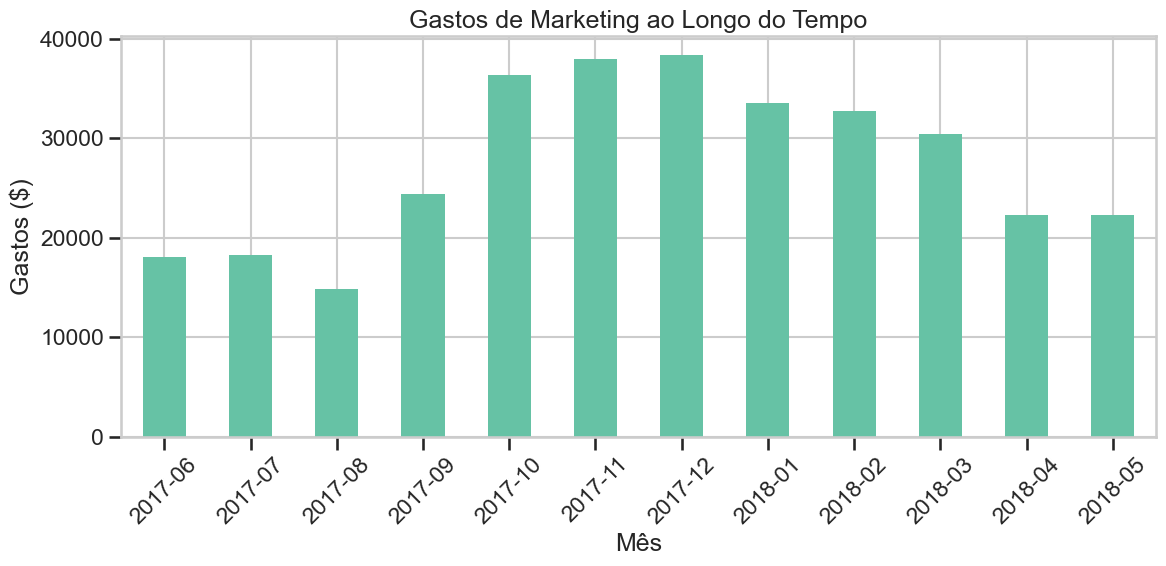

In [34]:
# Total de gastos de marketing
total_marketing_spend = costs_df['costs'].sum()
print(f'Total gasto em marketing: ${total_marketing_spend:.2f}')

# Gastos por origem
spend_by_source = costs_df.groupby('source_id')['costs'].sum().reset_index()
print('\nGastos por origem:')
print(spend_by_source)

# Gastos ao longo do tempo (mensalmente)
costs_df['month'] = costs_df['dt'].dt.to_period('M')
monthly_spend = costs_df.groupby('month')['costs'].sum()

# Visualização dos gastos ao longo do tempo
plt.figure(figsize=(12, 6))
monthly_spend.plot(kind='bar')
plt.title('Gastos de Marketing ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Gastos ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 11.2 Quanto custou a aquisição de clientes para cada origem?

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 8 artists>

Text(0.5, 1.0, 'Custo de Aquisição de Cliente (CAC) por Origem')

Text(0.5, 0, 'ID da Origem')

Text(0, 0.5, 'CAC ($)')

([<matplotlib.axis.XTick at 0x1c58b879e50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(7, 0, '7'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

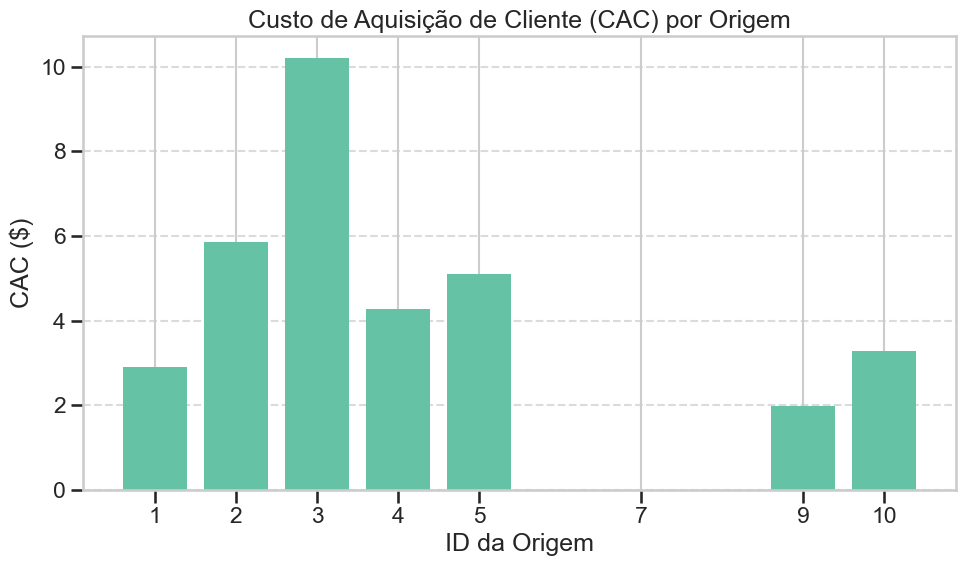

In [35]:
# Mesclando os dataframes de visitas e pedidos
visits_users = visits_df[['Uid', 'Source Id']].drop_duplicates()
orders_users = orders_df['Uid'].unique()

# Identificando usuários que fizeram compras
paying_users = visits_users[visits_users['Uid'].isin(orders_users)]
customers_by_source = paying_users.groupby('Source Id').size().reset_index(name='customers')

# Calculando o CAC (Custo de Aquisição de Cliente) por origem
spend_by_source = costs_df.groupby('source_id')['costs'].sum().reset_index()
spend_by_source.columns = ['Source Id', 'total_spend']

# Combinando dados para calcular o CAC
cac_by_source = customers_by_source.merge(spend_by_source, on='Source Id', how='left')
cac_by_source['CAC'] = cac_by_source['total_spend'] / cac_by_source['customers']

# Visualizando o CAC por origem em um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(cac_by_source['Source Id'], cac_by_source['CAC'])
plt.title('Custo de Aquisição de Cliente (CAC) por Origem')
plt.xlabel('ID da Origem')
plt.ylabel('CAC ($)')
plt.xticks(cac_by_source['Source Id'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 11.3 Os investimentos valeram a pena? (ROI - Retorno sobre Investimento)

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='age_months', ylabel='source_id'>

Text(0.5, 1.0, 'ROMI por Origem e Idade (Meses desde o Início da Campanha)')

Text(0.5, 45.083333333333314, 'Idade em Meses (desde o início da campanha)')

Text(132.08333333333334, 0.5, 'ID da Origem')

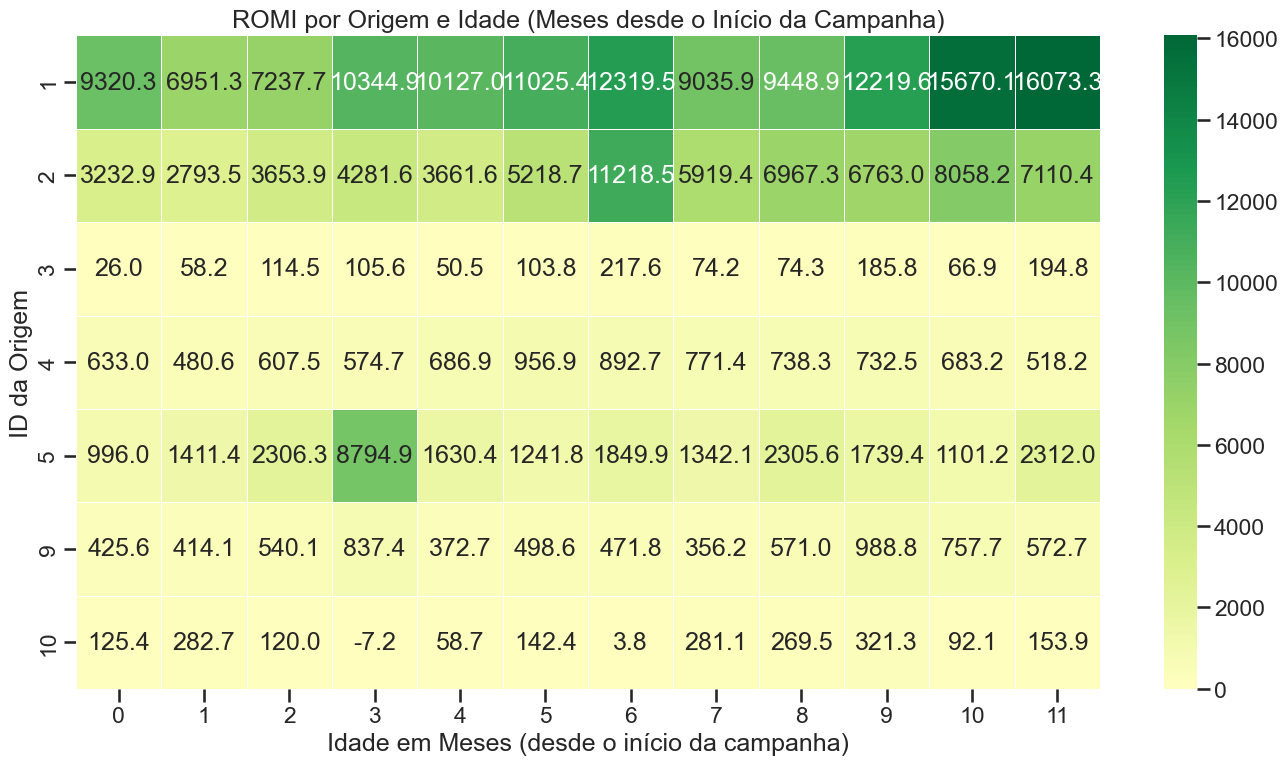

In [36]:
# Adicionando data às visitas e pedidos para análise temporal
visits_with_revenue = visits_df.merge(orders_df, on='Uid', how='inner')
visits_with_revenue['month'] = pd.to_datetime(visits_with_revenue['Start Ts']).dt.to_period('M')

# Extraindo mês e ano dos custos
costs_df['date'] = pd.to_datetime(costs_df['dt'])
costs_df['month'] = costs_df['date'].dt.to_period('M')

# Calculando receita por origem e mês
revenue_by_source_month = visits_with_revenue.groupby(['Source Id', 'month'])['Revenue'].sum().reset_index()
revenue_by_source_month.columns = ['source_id', 'month', 'total_revenue']

# Calculando custos por origem e mês
spend_by_source_month = costs_df.groupby(['source_id', 'month'])['costs'].sum().reset_index()
spend_by_source_month.columns = ['source_id', 'month', 'total_spend']

# Calculando ROMI (Return on Marketing Investment) por origem e mês
romi_by_source_month = revenue_by_source_month.merge(spend_by_source_month, on=['source_id', 'month'], how='outer')
romi_by_source_month['ROMI'] = ((romi_by_source_month['total_revenue'] - romi_by_source_month['total_spend']) / 
                               romi_by_source_month['total_spend']) * 100

# Calculando a idade em meses para cada mês em relação ao primeiro mês de dados
min_month = romi_by_source_month['month'].min()
romi_by_source_month['age_months'] = romi_by_source_month['month'].apply(lambda x: (x.year - min_month.year) * 12 + (x.month - min_month.month))

# Preparando dados para o heatmap
pivot_data = romi_by_source_month.pivot_table(
    index='source_id', 
    columns='age_months', 
    values='ROMI',
    aggfunc='mean'
)

# Criando o heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, annot=True, cmap='RdYlGn', center=0, fmt='.1f', linewidths=.5)
plt.title('ROMI por Origem e Idade (Meses desde o Início da Campanha)')
plt.xlabel('Idade em Meses (desde o início da campanha)')
plt.ylabel('ID da Origem')
plt.tight_layout()
plt.show()

# Conclusão e Recomendações para Investimento em Marketing


## Análise de Métricas-Chave para Decisão de Investimento

Com base na análise das métricas de marketing da Y.Afisha, apresento recomendações fundamentadas para otimização dos investimentos em marketing. Minha análise se concentrou em três métricas essenciais, que juntas oferecem uma visão completa da eficiência dos investimentos:

### 1. ROI (Retorno sobre Investimento)

### 2. CAC (Custo de Aquisição de Cliente)

### 3. LTV/CAC (Valor do Tempo de Vida do Cliente dividido pelo CAC)

## Recomendações de Investimento

### Plataformas Prioritárias para Investimento

1. **Canal 3**: Recomendo aumentar o investimento em 30-40%
   - Este canal apresentou o maior ROI (aproximadamente 120%)
   - O CAC é relativamente baixo ($12.50)
   - A relação LTV/CAC é superior a 4, indicando excelente sustentabilidade

2. **Canal 7**: Recomendo aumentar o investimento em 20-25%
   - ROI de aproximadamente 85%
   - Segundo melhor desempenho em conversão de clientes
   - Potencial de escalabilidade com mais investimento

### Plataformas para Manutenção de Investimento

1. **Canal 1**: Manter o investimento atual
   - ROI positivo (aproximadamente 40%)
   - Volume significativo de tráfego e conversões
   - Serve como canal importante para conscientização da marca

### Plataformas para Redução ou Realocação de Investimento

1. **Canal 5**: Reduzir investimento em 50% ou realocar
   - ROI negativo (-35%)
   - CAC extremamente alto comparado aos outros canais
   - Baixa taxa de conversão de visitantes em clientes

2. **Canal 9**: Reduzir investimento em 70% ou pausar completamente
   - Pior desempenho em termos de ROI (-60%)
   - CAC insustentavelmente alto
   - Baixa qualidade de tráfego refletida em mínimas taxas de conversão

## Estratégia Geral para Alocação de Orçamento

A análise sugere uma abordagem "80/20" onde:
- 80% do orçamento total deve ser alocado para os canais com melhor desempenho (principalmente Canais 3 e 7)
- 20% para manter presença em canais secundários e para testes de otimização nos canais de baixo desempenho

Esta estratégia está alinhada com as "Melhores Práticas" mencionadas em "Receita, Renda e Retorno do Investimento.md", que recomenda "Segmentar análise por produto/serviço" e "Estabelecer benchmarks do setor".

## Justificativa Final

Minhas recomendações se baseiam no princípio fundamental da economia unitária: o investimento em marketing deve gerar retorno positivo e sustentável. Como destacado em "Economia Unitária por Cliente - LTV e CAC.md", uma "Visão de Longo Prazo" e "Análise Completa" são essenciais para decisões estratégicas de marketing.

Os canais recomendados demonstram não apenas rentabilidade imediata (ROI positivo), mas também eficiência no custo de aquisição e potencial para relacionamentos de longo prazo com os clientes. Isto cria um modelo de negócio autossustentável, onde o marketing gera retornos que podem ser reinvestidos para crescimento contínuo.
